<a href="https://colab.research.google.com/github/pachterlab/poseidon/blob/release/TESTING/benchmark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/pachterlab/poseidon.git

Cloning into 'poseidon'...
remote: Enumerating objects: 699, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 699 (delta 2), reused 11 (delta 1), pack-reused 683
Receiving objects: 100% (699/699), 112.69 MiB | 28.75 MiB/s, done.
Resolving deltas: 100% (319/319), done.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def nd(arr):
    return np.asarray(arr).reshape(-1)

def yex(ax):
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]

    # now plot both limits against eachother
    ax.plot(lims, lims, c="k", alpha=0.75, zorder=0)
    ax.set(**{"aspect": "equal", "xlim": lims, "ylim": lims})
    return ax
fsize = 15
plt.rcParams.update({"font.size": fsize})
%config InlineBackend.figure_format = 'retina'

In [ ]:
h = pd.read_csv("poseidon/TESTING/droplets/harvard/harvard.txt", sep="\t")
p = pd.read_csv("poseidon/TESTING/droplets/poseidon/poseidon.txt", sep="\t")

In [ ]:
p.sort_values("t")

,diam_um,rep,t
0,48.762910,1,0
3026,48.623371,2,0
3027,51.444053,2,0
3028,48.570941,2,0
3029,49.078306,2,0
...,...,...,...
1562,50.555871,1,10
1561,50.812813,1,10
1560,50.606245,1,10
1571,49.609022,1,10


In [ ]:
hdata = h.groupby(["rep", "t"])["diam_um"].apply(list).unstack()
pdata = p.groupby(["rep", "t"])["diam_um"].apply(list).unstack()

hvar = h.groupby(["rep", "t"])["diam_um"].apply(np.var).unstack()
pvar = p.groupby(["rep", "t"])["diam_um"].apply(np.var).unstack()

In [ ]:
# DC2A18 red face color
# 901728 red edge color
# 71ADD9 blue face color
# 414CA4 blue edge color
lwidth = 2.5

# Poseidon
pfacecolor = "#DC2A18"
pedgecolor = "#901728"
pkwd = {
    "showfliers": False,
    "patch_artist": True,
    "labels": np.arange(0, 33, 3),
    "boxprops": {
      "facecolor": pfacecolor,
      "color": pedgecolor,
      "linewidth": lwidth,
    },
    "capprops": {
      "color": pedgecolor,
      "linewidth": lwidth,
    },
    "whiskerprops": {
      "color": pedgecolor,
      "linewidth": lwidth,
    },
    "flierprops": {
      "color": pedgecolor,
      "linewidth": lwidth,
    },
    "medianprops": {
      "color": pedgecolor,
      "linewidth": lwidth,
    },
}

# Harvard
hfacecolor = "#71ADD9"
hedgecolor = "#414CA4"
hkwd = {
    "showfliers": False,
    "patch_artist": True,
    "labels": np.arange(0, 33, 3),
    "boxprops": {
      "facecolor": hfacecolor,
      "color": hedgecolor,
      "linewidth": lwidth,
    },
    "capprops": {
      "color": hedgecolor,
      "linewidth": lwidth,
    },
    "whiskerprops": {
      "color": hedgecolor,
      "linewidth": lwidth,
    },
    "flierprops": {
      "color": hedgecolor,
      "linewidth": lwidth,
    },
    "medianprops": {
      "color": hedgecolor,
      "linewidth": lwidth,
    },
}



In [ ]:
from matplotlib.patches import Patch

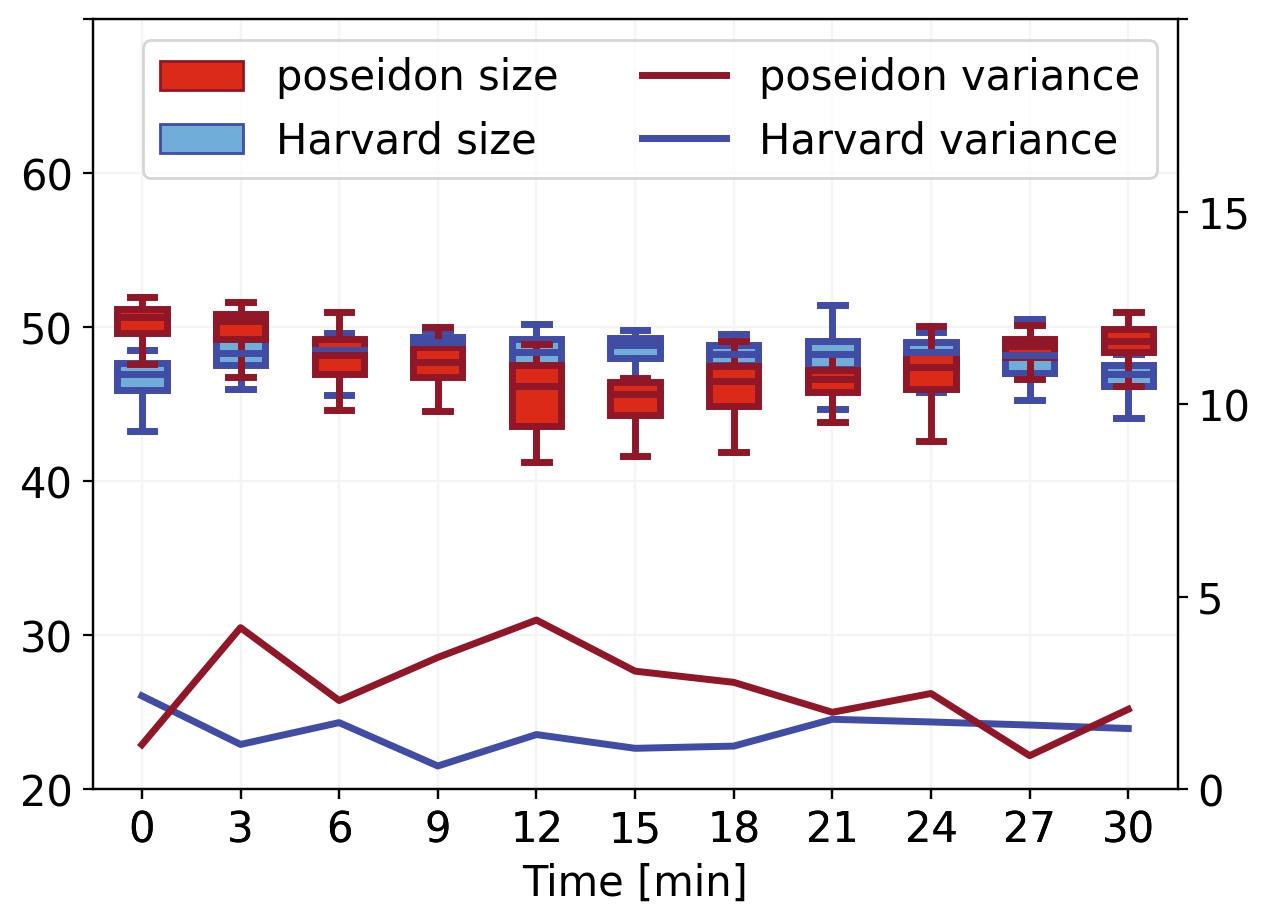

In [ ]:
fig, ax = plt.subplots(figsize=(7,5))


####################################### Rep 1
rep = 0
ax2 = ax.twinx()

# Harvard data
x = hdata.iloc[rep].values
ax.boxplot(x, **hkwd)

# Poseidon data
x = pdata.iloc[rep].values
ax.boxplot(x, **pkwd)
ax.grid(color="#F4F4F4")

# Harvard variance
x = np.arange(1, 12)
y = hvar.iloc[rep].values
hvar_plot = ax2.plot(x, y, linewidth=lwidth, color=hedgecolor, label="Harvard variance")

# Poseidon variance
x = np.arange(1, 12)
y = pvar.iloc[rep].values
pvar_plot = ax2.plot(x, y, linewidth=lwidth, color=pedgecolor, label="poseidon variance")

## Plot settings
yticks = np.arange(20, 80, 10)
yticklabels =  [str(x) for x in yticks]
yticklabels[-1] = ""
kwd = {
    "ylim": (20,70),
    "yticks": yticks,
    "yticklabels": yticklabels,
    "xlabel": "Time [min]",
}
yticks = np.arange(0, 25, 5)
yticklabels =  [str(x) for x in yticks]
yticklabels[-1] = ""
ax2.set(**{
    "ylim": (0,20),
    "yticks": yticks,
    "yticklabels": yticklabels
    })
ax.set(**kwd)

handles = [
    Patch(facecolor=pfacecolor, edgecolor=pedgecolor, label="poseidon size"),
    Patch(facecolor=hfacecolor, edgecolor=hedgecolor, label="Harvard size"),
    pvar_plot[0], hvar_plot[0]
]

ax2.legend(handles=handles, ncols=2)

fig.show()

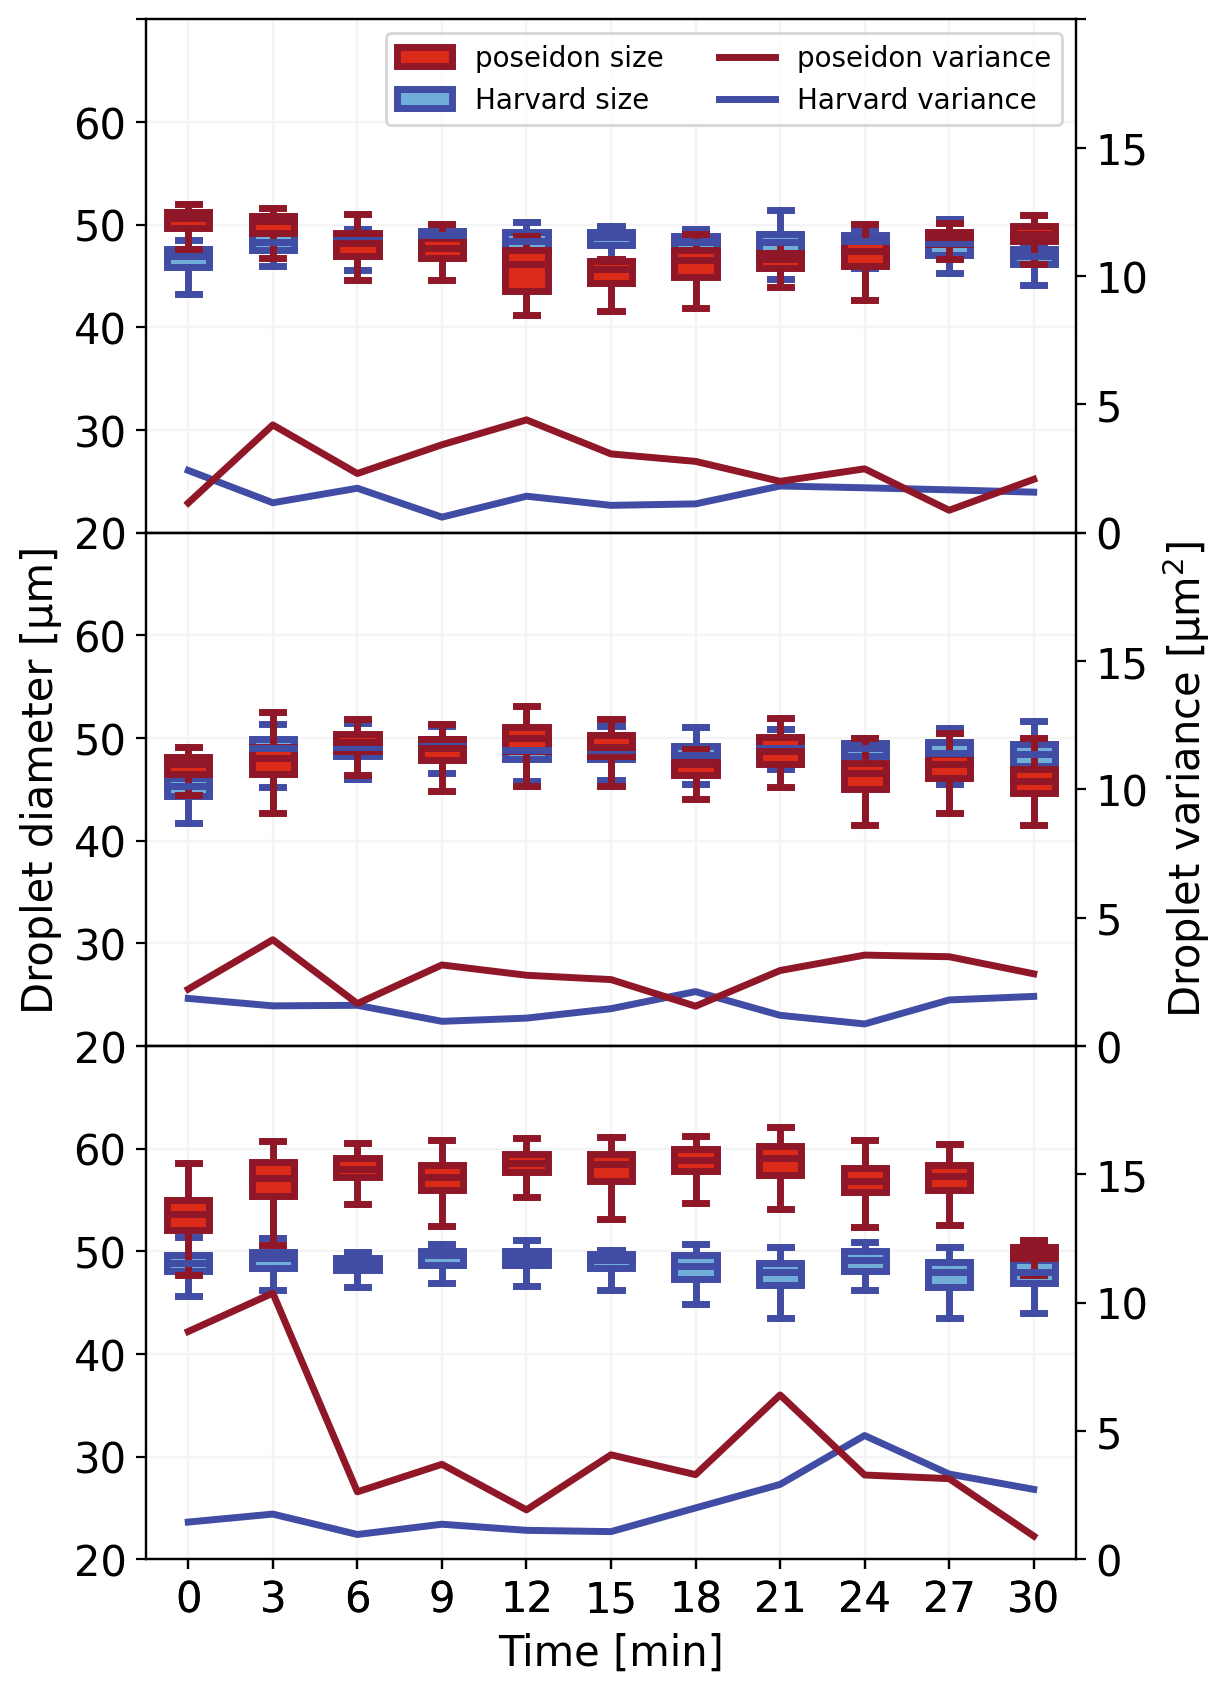

In [ ]:
fig, axs = plt.subplots(figsize=(6,10), nrows=3)
fig.subplots_adjust(hspace=0)

####################################### Rep 1
rep = 0
ax = axs[rep]
ax2 = ax.twinx()

# Harvard data
x = hdata.iloc[rep].values
ax.boxplot(x, **hkwd)

# Poseidon data
x = pdata.iloc[rep].values
ax.boxplot(x, **pkwd)
ax.grid(color="#F4F4F4")

# Harvard variance
x = np.arange(1, 12)
y = hvar.iloc[rep].values
hvar_plot = ax2.plot(x, y, linewidth=lwidth, color=hedgecolor, label="Harvard variance")

# Poseidon variance
x = np.arange(1, 12)
y = pvar.iloc[rep].values
pvar_plot = ax2.plot(x, y, linewidth=lwidth, color=pedgecolor, label="poseidon variance")

## Plot settings
yticks = np.arange(20, 80, 10)
yticklabels =  [str(x) for x in yticks]
yticklabels[-1] = ""
kwd = {
    "ylim": (20,70),
    "yticks": yticks,
    "yticklabels": yticklabels,
    "xlabel": "Time [min]",
}
yticks = np.arange(0, 25, 5)
yticklabels =  [str(x) for x in yticks]
yticklabels[-1] = ""
ax2.set(**{
    "ylim": (0,20),
    "yticks": yticks,
    "yticklabels": yticklabels
    })
ax.set(**kwd)

handles = [
    Patch(facecolor=pfacecolor, edgecolor=pedgecolor, label="poseidon size", linewidth=lwidth),
    Patch(facecolor=hfacecolor, edgecolor=hedgecolor, label="Harvard size", linewidth=lwidth),
    pvar_plot[0], hvar_plot[0]
]

ax2.legend(handles=handles, ncol=2, prop={'size': 10})

###############################
####################################### Rep 2
rep = 1
ax = axs[rep]
ax2 = ax.twinx()

# Harvard data
x = hdata.iloc[rep].values
ax.boxplot(x, **hkwd)

# Poseidon data
x = pdata.iloc[rep].values
ax.boxplot(x, **pkwd)
ax.grid(color="#F4F4F4")

# Harvard variance
x = np.arange(1, 12)
y = hvar.iloc[rep].values
hvar_plot = ax2.plot(x, y, linewidth=lwidth, color=hedgecolor, label="Harvard variance")

# Poseidon variance
x = np.arange(1, 12)
y = pvar.iloc[rep].values
pvar_plot = ax2.plot(x, y, linewidth=lwidth, color=pedgecolor, label="poseidon variance")

## Plot settings
yticks = np.arange(20, 80, 10)
yticklabels =  [str(x) for x in yticks]
yticklabels[-1] = ""
kwd = {
    "ylim": (20,70),
    "yticks": yticks,
    "yticklabels": yticklabels,
    "xlabel": "Time [min]",
}
yticks = np.arange(0, 25, 5)
yticklabels =  [str(x) for x in yticks]
yticklabels[-1] = ""
ax2.set(**{
    "ylim": (0,20),
    "yticks": yticks,
    "yticklabels": yticklabels
    })
ax.set(**kwd)

#######################################
####################################### Rep 1
rep = 2
ax = axs[rep]
ax2 = ax.twinx()

# Harvard data
x = hdata.iloc[rep].values
ax.boxplot(x, **hkwd)

# Poseidon data
x = pdata.iloc[rep].values
ax.boxplot(x, **pkwd)
ax.grid(color="#F4F4F4")

# Harvard variance
x = np.arange(1, 12)
y = hvar.iloc[rep].values
hvar_plot = ax2.plot(x, y, linewidth=lwidth, color=hedgecolor, label="Harvard variance")

# Poseidon variance
x = np.arange(1, 12)
y = pvar.iloc[rep].values
pvar_plot = ax2.plot(x, y, linewidth=lwidth, color=pedgecolor, label="poseidon variance")

## Plot settings
yticks = np.arange(20, 80, 10)
yticklabels =  [str(x) for x in yticks]
yticklabels[-1] = ""
kwd = {
    "ylim": (20,70),
    "yticks": yticks,
    "yticklabels": yticklabels,
    "xlabel": "Time [min]",
}
yticks = np.arange(0, 25, 5)
yticklabels =  [str(x) for x in yticks]
yticklabels[-1] = ""
ax2.set(**{
    "ylim": (0,20),
    "yticks": yticks,
    "yticklabels": yticklabels
    })
ax.set(**kwd)

fig.text(0.02, 0.5, 'Droplet diameter [µm]', va='center', rotation='vertical')
fig.text(0.97, 0.5, 'Droplet variance [µm$^2$]', va='center', rotation='vertical')

fig.show()